In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
# os.getcwd()

import wfdb
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

import locomotif.locomotif as locomotif
import locomotif.visualize as visualize

In [2]:
DATASET_PATH = os.path.join(".", "mitdb_dataset")

Download the dataset

In [3]:
wfdb.dl_database('mitdb', DATASET_PATH, ['234'])

Generating record list for: 234
Generating list of all files for: 234
Finished downloading files


Select a part of the ECG dataset with a noticeable baseline

In [4]:
record = wfdb.rdrecord(os.path.join(DATASET_PATH, '234'))
signal = record.p_signal[144000:150000, 0]

Plot

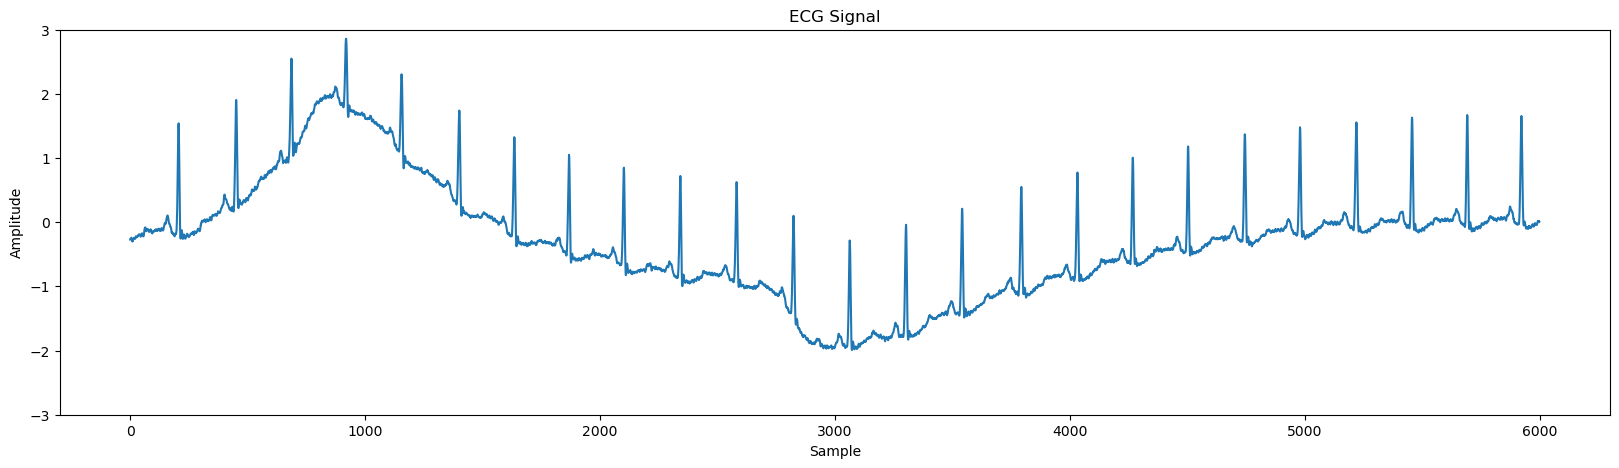

In [5]:
plt.figure(figsize=(20, 5))
plt.plot(signal)
plt.title('ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.ylim(-3, 3)
plt.show()

## Motif discovery

Set parameters for LoCoMotif

In [6]:
# Parameter rho determines the 'strictness' of the algorithm  
#   - higher -> more strict (more similarity in discovered motif sets)
#   - lower  -> less strict (less similarity in discovered motif sets) 
rho = 0.6

# Number of motifs to be found
nb_motifs = 10

l_min = int(100)
l_max = int(500)

# This parameter determines how much the motifs may overlap (intra and inter motif set)
overlap = 0

Preprocessing: Remove the baseline by removing the median and applying a high-pass filter whose cutoff frequency is determined by the motif length range (`l_min` and `l_max`)

In [7]:
filtered_signal = filtfilt(*butter(1, 1/((l_max + l_min)/2), btype='high'), signal - np.median(signal))

Plot the signal before and after baseline removal:

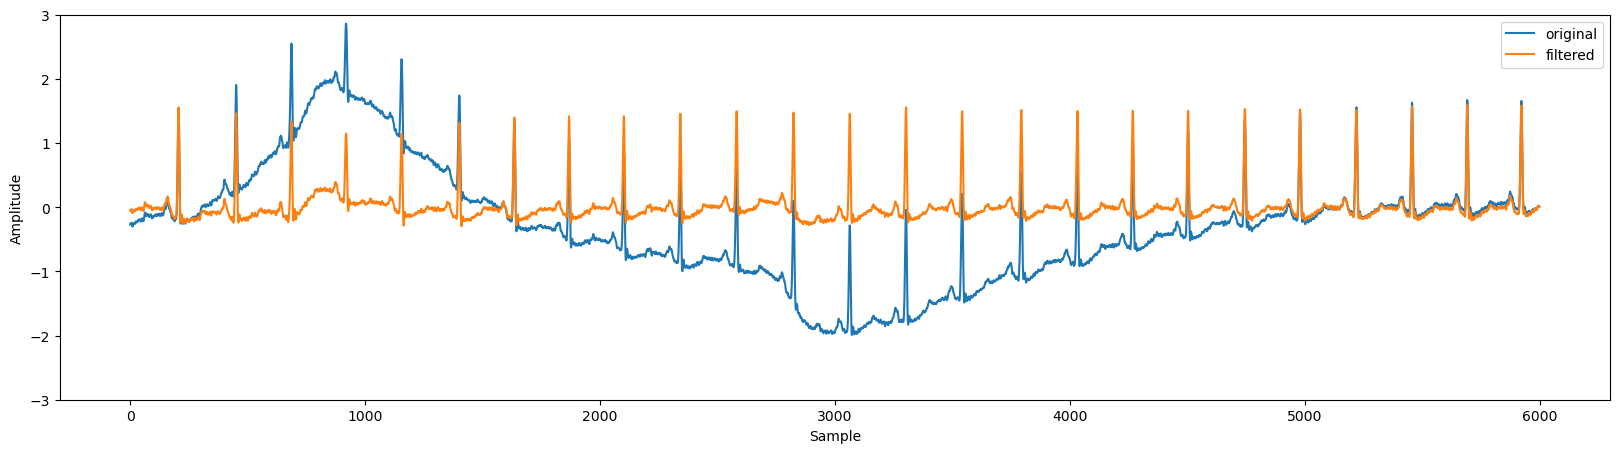

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(signal)
plt.plot(filtered_signal)
# plt.title('ECG Signal')
plt.legend(['original', 'filtered'])
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.ylim(-3, 3)
plt.show()

Apply LoCoMotif on the raw signal (without baseline removal)

In [9]:
series = signal.copy()
series = (series - np.mean(series, axis=0)) / np.std(series, axis=0) # z-normalize time series
motif_sets = locomotif.apply_locomotif(series, rho, l_min, l_max, nb_motifs, overlap=overlap)
print(motif_sets)

[[(4345, 4580), (4109, 4344), (4581, 4815), (3875, 4108), (4821, 5055), (5058, 5292), (5297, 5527), (2179, 2417), (2423, 2683), (1945, 2178), (1710, 1944), (1449, 1711), (5532, 5757), (47, 283), (5763, 5966)], [(3411, 3604), (3173, 3364), (3651, 3843), (2933, 3174), (2684, 2886)], [(1295, 1399), (1227, 1279), (349, 450), (542, 640), (1175, 1228)], [(1009, 1125), (809, 911), (675, 772)]]


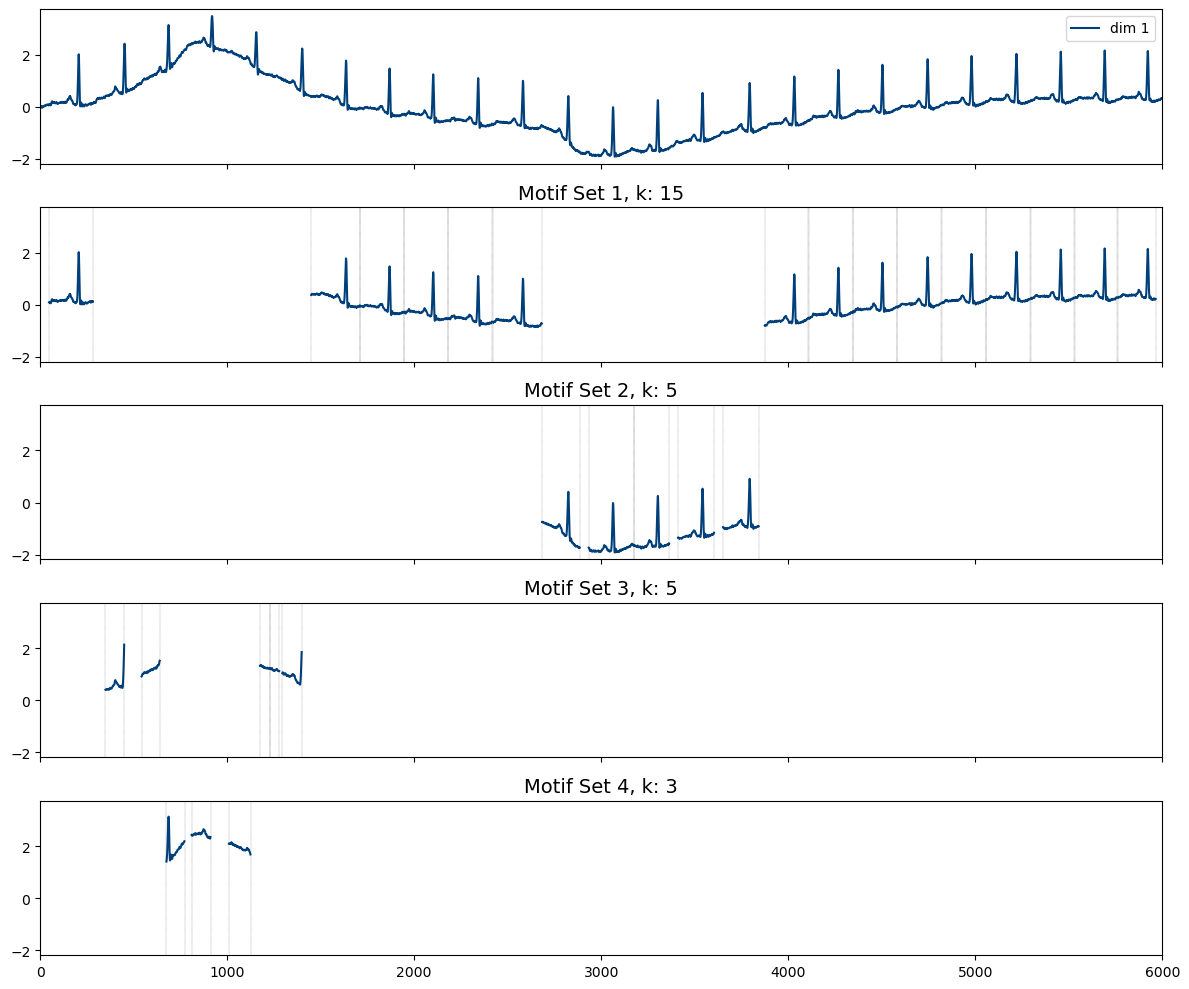

In [10]:
import locomotif.visualize as visualize
import matplotlib.pyplot as plt
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

Apply LoCoMotif on the preprocessed signal (with baseline removed)

In [11]:
series = filtered_signal.copy()
series = (series - np.mean(series, axis=0)) / np.std(series, axis=0) # z-normalize time series
motif_sets = locomotif.apply_locomotif(series, rho, l_min, l_max, nb_motifs, overlap=overlap)
print(motif_sets)

[[(1642, 1864), (1162, 1397), (2108, 2338), (3310, 3537), (4040, 4264), (3549, 3789), (4511, 4741), (3801, 4028), (458, 682), (4988, 5215), (4276, 4500), (3070, 3298), (4753, 4977), (5464, 5688), (2348, 2577), (1408, 1631), (1875, 2097), (5228, 5453), (212, 447)], [(2594, 2706), (5752, 5881), (75, 169), (698, 781)], [(2706, 2822), (1026, 1155)]]


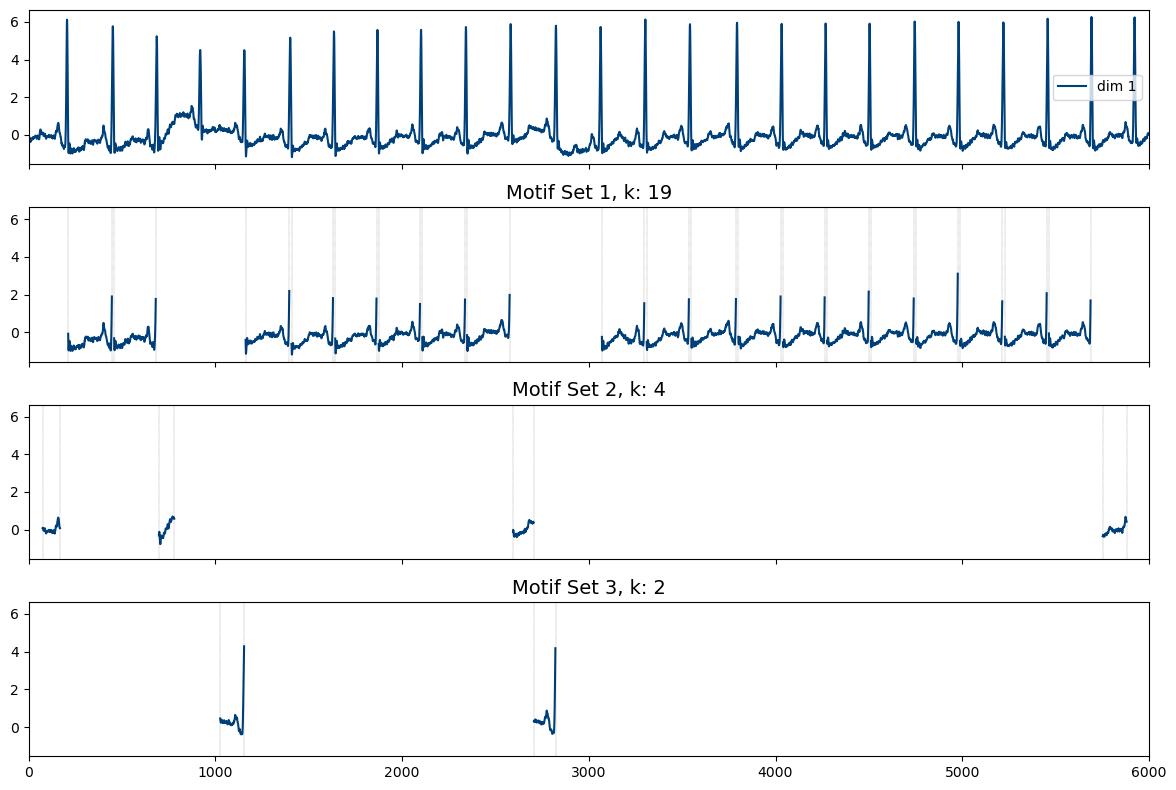

In [12]:
import locomotif.visualize as visualize
import matplotlib.pyplot as plt
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()